Applying Logistic Regression, Decision Trees and L

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import copy
import math

In [3]:
data = pd.read_csv("wdbc.data", header = None)

#### Splitting the data into Train, Eval and Test

In [4]:
train_eval_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42, stratify = data[1])

In [5]:
train_set, eval_set = train_test_split(train_eval_set, test_size = 0.3, random_state = 42, stratify = train_eval_set[1])

In [6]:
# print(data.shape)
# print(train_set.shape)
# print(eval_set.shape)
# print(test_set.shape)

In [7]:
train_X = train_set.drop([0, 1], axis = 1)
train_Y = train_set[1]

In [8]:
eval_X = eval_set.drop([0, 1], axis = 1)
eval_Y = eval_set[1]

In [9]:
test_X = test_set.drop([0, 1], axis = 1)
test_Y = test_set[1]

In [10]:
train_eval_set_X = train_eval_set.drop([0, 1], axis = 1)
train_eval_set_Y = train_eval_set[1]

#### Exploring the dataset

In [11]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
223,8812877,M,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.064620,...,19.560,30.29,125.90,1088.0,0.1552,0.4480,0.39760,0.14790,0.3993,0.10640
237,883263,M,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.060220,...,24.220,26.17,161.70,1750.0,0.1228,0.2311,0.31580,0.14450,0.2238,0.07127
87,86135502,M,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.082710,...,24.560,30.41,152.90,1623.0,0.1249,0.3206,0.57550,0.19560,0.3956,0.09288
61,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,...,9.565,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712
500,914862,B,15.040,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.061420,...,16.760,20.43,109.70,856.9,0.1135,0.2176,0.18560,0.10180,0.2177,0.08549


In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 223 to 493
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       318 non-null    int64  
 1   1       318 non-null    object 
 2   2       318 non-null    float64
 3   3       318 non-null    float64
 4   4       318 non-null    float64
 5   5       318 non-null    float64
 6   6       318 non-null    float64
 7   7       318 non-null    float64
 8   8       318 non-null    float64
 9   9       318 non-null    float64
 10  10      318 non-null    float64
 11  11      318 non-null    float64
 12  12      318 non-null    float64
 13  13      318 non-null    float64
 14  14      318 non-null    float64
 15  15      318 non-null    float64
 16  16      318 non-null    float64
 17  17      318 non-null    float64
 18  18      318 non-null    float64
 19  19      318 non-null    float64
 20  20      318 non-null    float64
 21  21      318 non-null    float64
 22  

In [13]:
data[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [14]:
train_set.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,3.180000e+02,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,...,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,3.947455e+07,14.187748,19.366667,92.351635,660.859748,0.095678,0.103543,0.087529,0.048458,0.180300,...,16.364953,25.816730,107.861447,891.043711,0.132243,0.255595,0.275599,0.115283,0.290668,0.083622
std,1.496882e+08,3.548175,4.337178,24.491744,357.611220,0.014299,0.052250,0.076948,0.038339,0.027124,...,4.875143,6.020909,33.904947,585.521940,0.023867,0.153330,0.207647,0.064318,0.063623,0.017157
min,8.670000e+03,7.691000,9.710000,48.340000,170.400000,0.064290,0.023440,0.000000,0.000000,0.106000,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.702288e+05,11.710000,16.392500,75.007500,420.300000,0.084748,0.063238,0.029260,0.019787,0.161825,...,13.015000,21.407500,84.367500,516.425000,0.116600,0.148600,0.120225,0.065518,0.250525,0.071155
50%,9.083315e+05,13.425000,18.760000,86.735000,554.300000,0.095190,0.093020,0.060765,0.033480,0.177750,...,15.050000,25.305000,98.085000,686.600000,0.131150,0.216550,0.229000,0.099425,0.281650,0.079525
75%,8.910741e+06,16.090000,21.832500,104.600000,798.550000,0.104050,0.130500,0.132050,0.070095,0.195300,...,19.197500,30.342500,127.000000,1123.250000,0.146925,0.343475,0.384700,0.161375,0.320400,0.091640
max,9.113205e+08,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.275600,0.663800,0.173000


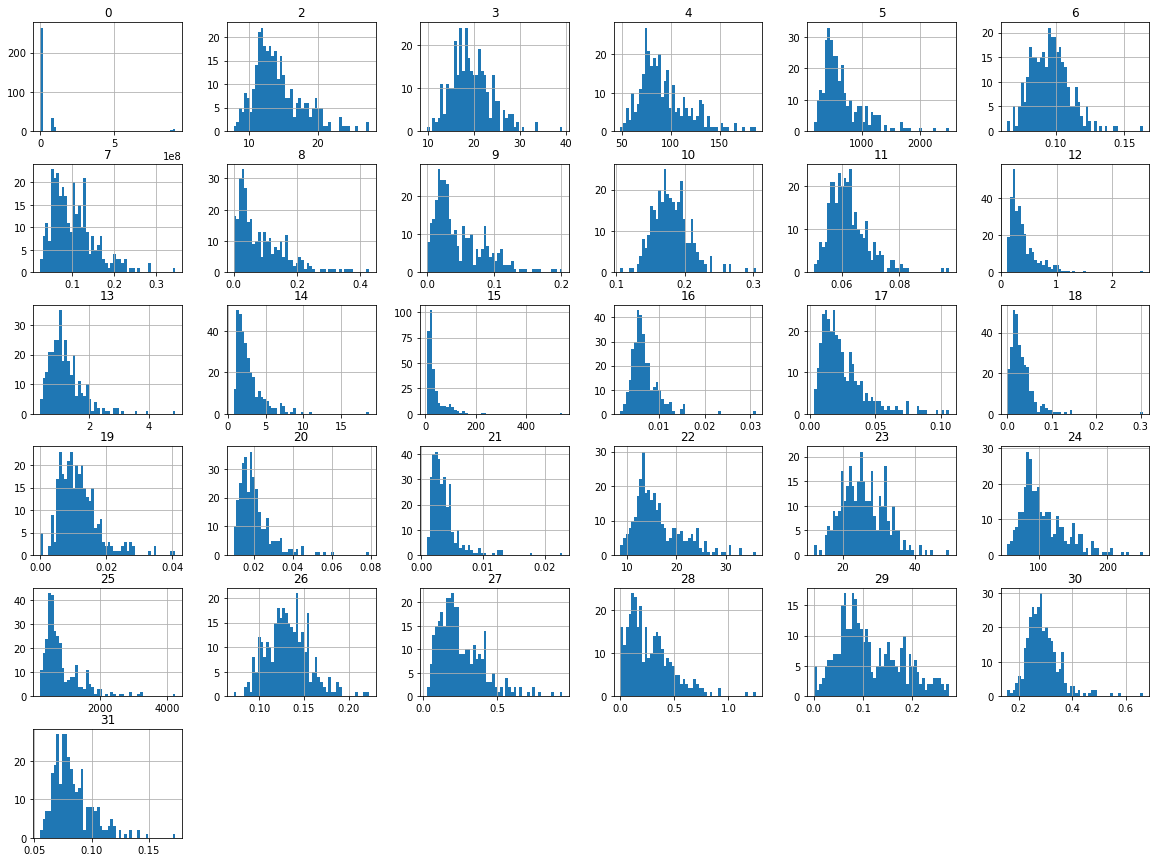

In [15]:
train_set.drop([0, 1]).hist(bins = 50, figsize=(20,15))
plt.show()

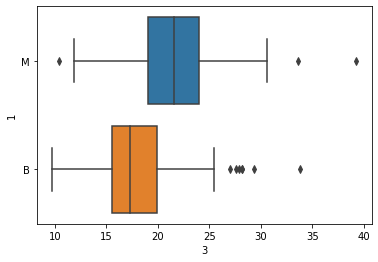

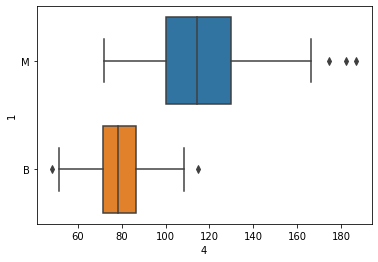

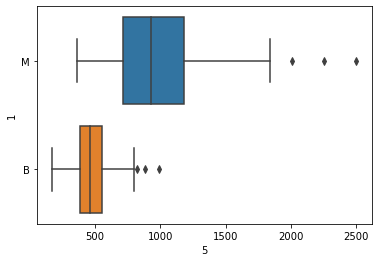

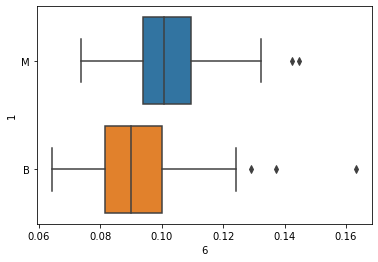

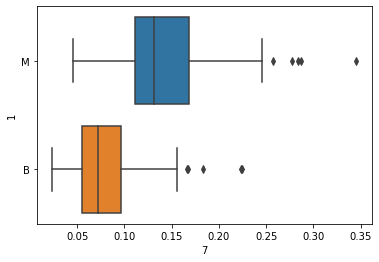

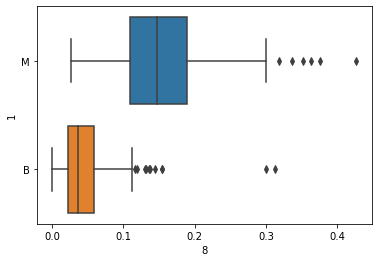

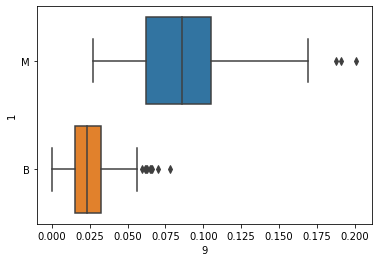

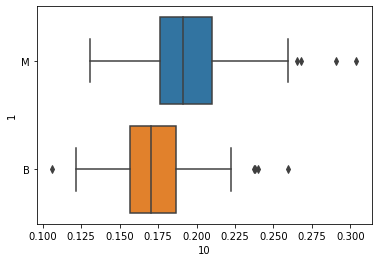

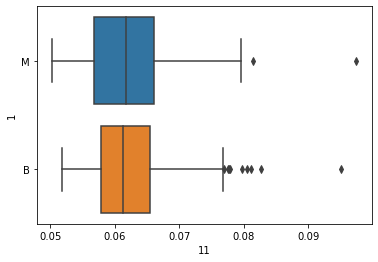

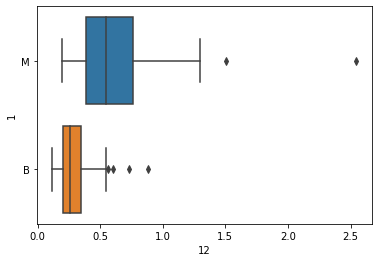

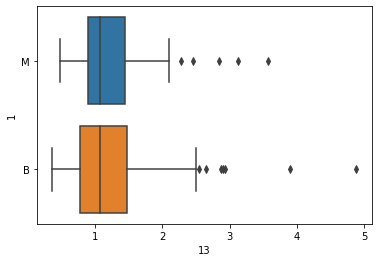

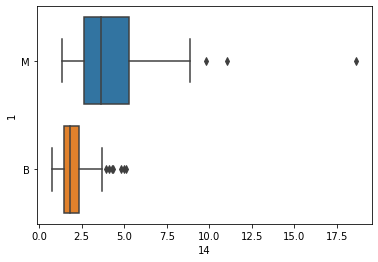

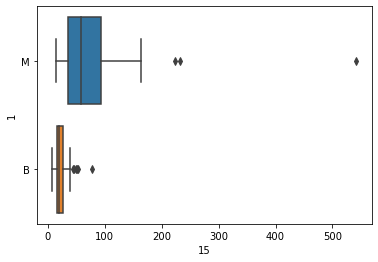

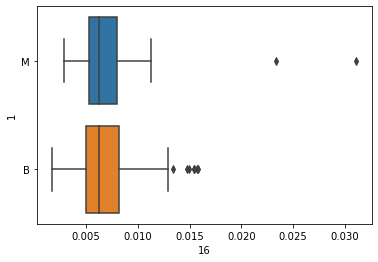

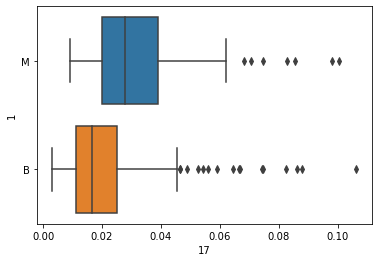

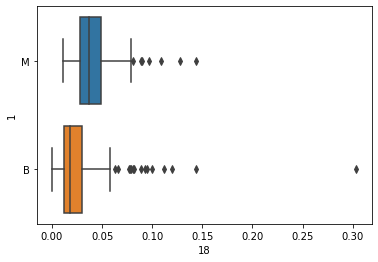

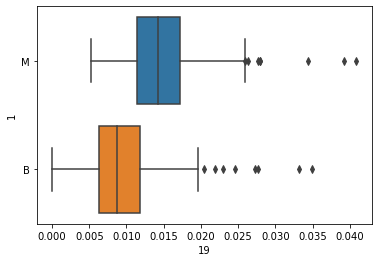

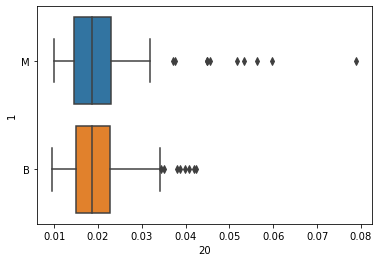

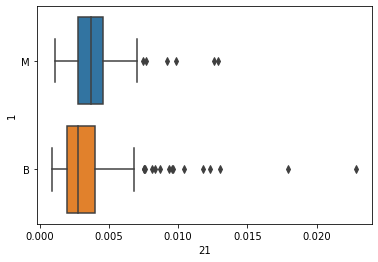

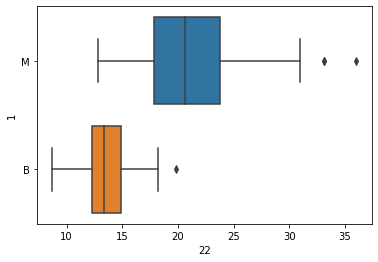

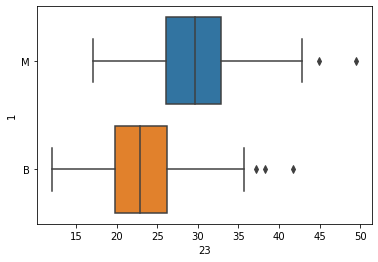

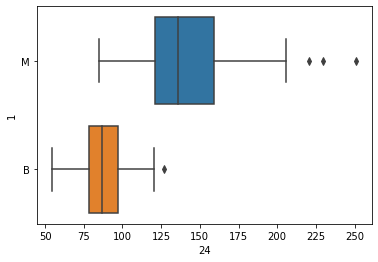

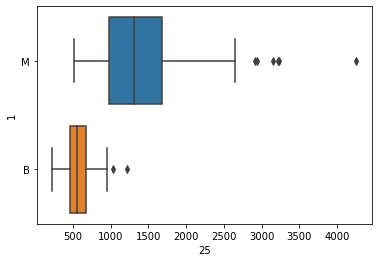

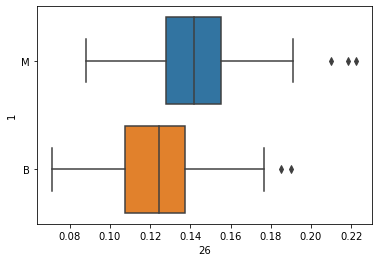

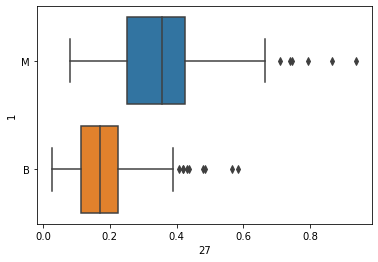

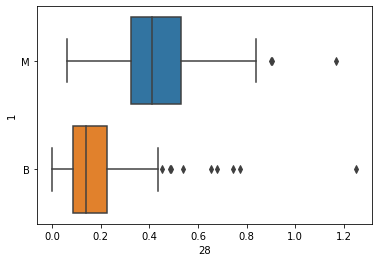

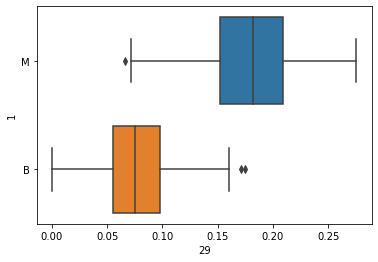

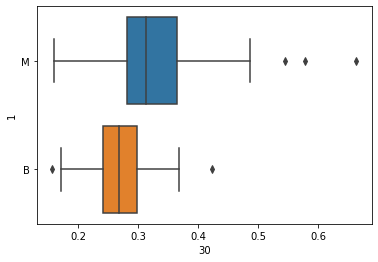

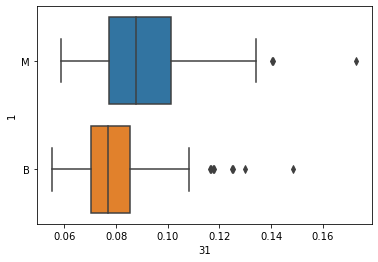

In [16]:
for col in range(3, 32):
    sns.boxplot(y = train_set[1], x = col, data=train_set)
    plt.show()

([], [])

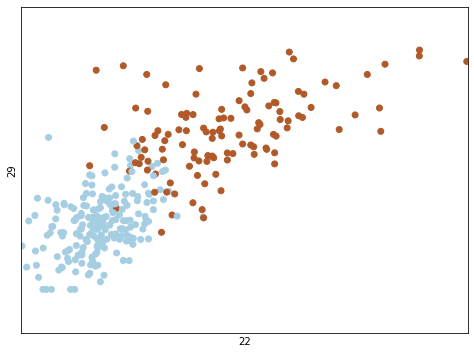

In [17]:
## Visualization of the data set
## From the above we select 22, 29 as the best features
from mpl_toolkits.mplot3d import Axes3D
i = 22
j = 29
X = train_set.loc[:, [i, j]] # we only take the important two features.
Y = copy.deepcopy(train_set[1])
Y[Y == "B"] = 0
Y[Y == "M"] = 1
x_min, x_max = X[i].min() - .05, X[i].max() + .05
y_min, y_max = X[j].min() - .05, X[j].max() + .05

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X[i], X[j], c=Y.values, cmap=plt.cm.Paired)
plt.xlabel(i)
plt.ylabel(j)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

#### Normalisation

In [18]:
scaler = MinMaxScaler()

In [19]:
train_X_norm = scaler.fit_transform(train_X)

In [20]:
eval_X_norm = scaler.transform(eval_X)

In [21]:
test_X_norm = scaler.transform(test_X)

In [22]:
train_eval_X_norm = scaler.transform(train_eval_set_X)

#### Decision Trees

In [23]:
distributions = dict(criterion = ["entropy", "gini"],
                     max_depth = range(2,10),
                     min_samples_leaf = range(5, 20)
)

In [24]:
tree_clf = DecisionTreeClassifier()

In [25]:
# clf = RandomizedSearchCV(tree_clf, distributions, random_state=42)
clf = GridSearchCV(tree_clf, distributions)

search = clf.fit(train_X, train_Y)

search.best_params_

tree_clf = DecisionTreeClassifier(**search.best_params_)

In [26]:
tree_clf.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8)

In [27]:
eval_pred = tree_clf.predict(eval_X)

In [28]:
confusion_matrix(eval_Y, eval_pred)

array([[83,  3],
       [ 3, 48]], dtype=int64)

In [29]:
df = pd.DataFrame(classification_report(eval_Y, eval_pred, output_dict=True))

In [30]:
df

,B,M,accuracy,macro avg,weighted avg
precision,0.965116,0.941176,0.956204,0.953146,0.956204
recall,0.965116,0.941176,0.956204,0.953146,0.956204
f1-score,0.965116,0.941176,0.956204,0.953146,0.956204
support,86.000000,51.000000,0.956204,137.000000,137.000000


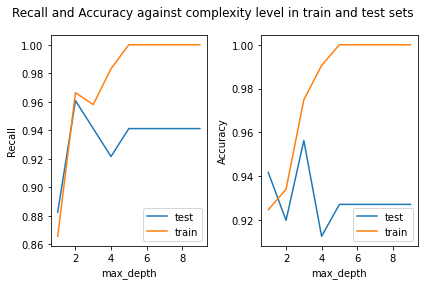

In [31]:
#To show overfitting and underfitting, with lower depth we should get underfitting 
    #and with higher depth we should get overfitting
complexity_values = range(1,10)

train_accuracies = []
test_accuracies = []
train_accuracies_recall = []
test_accuracies_recall = []

for complexity_value in complexity_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value, 
                                 random_state=42)
    
    clf.fit(train_X, train_Y)
    
    y_pred = clf.predict(eval_X)
    test_accuracies.append(accuracy_score(eval_Y, y_pred))
    test_accuracies_recall.append(recall_score(eval_Y, y_pred, pos_label="M"))
    
    y_pred = clf.predict(train_X)
    train_accuracies_recall.append(recall_score(train_Y, y_pred, pos_label="M"))
    train_accuracies.append(accuracy_score(train_Y, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Recall and Accuracy against complexity level in train and test sets')
line1, = ax1.plot(complexity_values, test_accuracies_recall,label='test_accuracies')
line2, = ax1.plot(complexity_values, train_accuracies_recall,label='train_accuracies')
    
line1, = ax2.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, = ax2.plot(complexity_values, train_accuracies,label='train_accuracies')

ax1.set_xlabel("max_depth")
ax2.set_xlabel("max_depth")

ax1.set_ylabel("Recall")
ax2.set_ylabel("Accuracy")
ax1.legend((line1, line2), ('test', 'train'))
ax2.legend((line1, line2), ('test', 'train'))
fig.tight_layout()
plt.show()

In [32]:
# We can see underfiting when max_depth <=2 where train and test 
    #are initially very close and training accuracy is low
# We can see overfitting when test accuracy decreases after 
    #max_depth = 3 and training accuracy keeps increasing

###### Exporting tree to a visual format

In [33]:
f = open("hw_1_dt.dot", 'w')
export_graphviz(
    tree_clf,
    out_file=f,
    feature_names = train_set.drop([0, 1], axis = 1).columns,
    class_names= train_set[1].unique(),
    rounded = True,
    filled = True
)

In [34]:
from graphviz import Source
path = 'hw_1_dt.dot'
s = Source.from_file(path)
s.view()

'hw_1_dt.dot.pdf'

#### KNN

In [35]:
neigh = KNeighborsClassifier()

In [36]:
distributions = dict(n_neighbors = range(3, 10),
                    weights = ["distance", "uniform"]
)

In [37]:
# clf = RandomizedSearchCV(tree_clf, distributions, random_state=42)
clf = GridSearchCV(neigh, distributions)

In [38]:
search = clf.fit(train_X_norm, train_Y)

In [39]:
search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [40]:
neigh = KNeighborsClassifier(**search.best_params_)

In [41]:
neigh.fit(train_X_norm, train_Y)

KNeighborsClassifier(weights='distance')

In [42]:
eval_pred = neigh.predict(eval_X_norm)

In [43]:
confusion_matrix(eval_Y, eval_pred)

array([[86,  0],
       [ 3, 48]], dtype=int64)

In [44]:
df = pd.DataFrame(classification_report(eval_Y, eval_pred, output_dict=True))

In [45]:
df

,B,M,accuracy,macro avg,weighted avg
precision,0.966292,1.000000,0.978102,0.983146,0.978840
recall,1.000000,0.941176,0.978102,0.970588,0.978102
f1-score,0.982857,0.969697,0.978102,0.976277,0.977958
support,86.000000,51.000000,0.978102,137.000000,137.000000


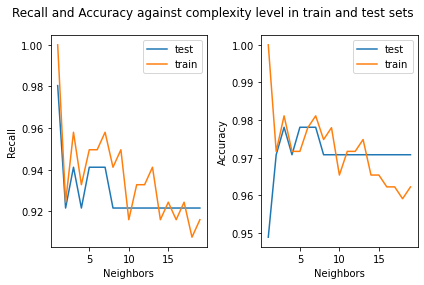

In [46]:
#To show overfitting and underfitting, with less number of neighbors underfitting 
#happens and with too many neighbors overfitting occurs
complexity_values = range(1,20)

train_accuracies = []
test_accuracies=[]
train_accuracies_recall = []
test_accuracies_recall =[]

for complexity_value in complexity_values:
    clf = KNeighborsClassifier(n_neighbors=complexity_value, weights="uniform")
    clf.fit(train_X_norm, train_Y)
    y_pred = clf.predict(eval_X_norm)
    test_accuracies.append(accuracy_score(eval_Y, y_pred))
    test_accuracies_recall.append(recall_score(eval_Y, y_pred, pos_label="M"))
    
    y_pred = clf.predict(train_X_norm)
    train_accuracies_recall.append(recall_score(train_Y, y_pred, pos_label="M"))
    train_accuracies.append(accuracy_score(train_Y, y_pred))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Recall and Accuracy against complexity level in train and test sets')
line1, = ax1.plot(complexity_values, test_accuracies_recall,label='test_accuracies')
line2, = ax1.plot(complexity_values, train_accuracies_recall,label='train_accuracies')
    
line1, = ax2.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, = ax2.plot(complexity_values, train_accuracies,label='train_accuracies')

ax1.set_xlabel("Neighbors")
ax2.set_xlabel("Neighbors")

ax1.set_ylabel("Recall")
ax2.set_ylabel("Accuracy")
ax1.legend((line1, line2), ('test', 'train'))
ax2.legend((line1, line2), ('test', 'train'))
fig.tight_layout()
plt.show()

In [47]:
#As number of neighbors increases the model is underfitting
#As the number of neighbors is low the model overfits on the data

#### Logistic Regression

In [70]:
log_reg = LogisticRegression()

In [49]:
distributions = dict(C= [1e-4, 1e-5, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                    tol = [1e-3, 1e-4, 1e-2],
                    penalty = [
                        "l1",
                        "l2"],
                    solver=[
                        "lbfgs",
                        "liblinear",
                        "newton-cg"
                    ],
)

In [50]:
# clf = RandomizedSearchCV(tree_clf, distributions, random_state=42)
clf = GridSearchCV(log_reg, distributions)

In [51]:
search = clf.fit(train_X_norm, train_Y)

In [52]:
best_params = copy.deepcopy(search.best_params_)
best_params

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

In [53]:
log_reg = LogisticRegression(**search.best_params_)

In [54]:
log_reg.fit(train_X_norm, train_Y)

LogisticRegression(C=100, penalty='l1', solver='liblinear', tol=0.01)

In [55]:
eval_pred = log_reg.predict(eval_X_norm)

In [56]:
confusion_matrix(eval_Y, eval_pred)

array([[84,  2],
       [ 1, 50]], dtype=int64)

In [57]:
df = pd.DataFrame(classification_report(eval_Y, eval_pred, output_dict=True))

In [58]:
df

,B,M,accuracy,macro avg,weighted avg
precision,0.988235,0.961538,0.978102,0.974887,0.978297
recall,0.976744,0.980392,0.978102,0.978568,0.978102
f1-score,0.982456,0.970874,0.978102,0.976665,0.978144
support,86.000000,51.000000,0.978102,137.000000,137.000000


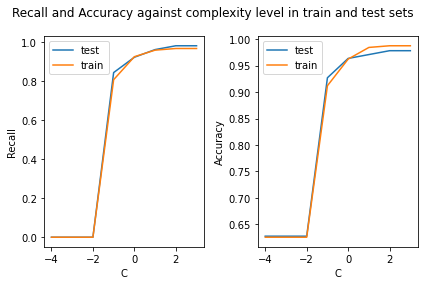

In [69]:
#To show overfitting and underfitting, with less C underfitting happens 
    #and with too much C overfitting occurs
complexity_values = [1e-4, 1e-3, 0.01, 0.1, 1, 10, 100, 1000]

train_accuracies = []
test_accuracies=[]

train_accuracies_recall = []
test_accuracies_recall =[]

log_reg_params = search.best_params_

for complexity_value in complexity_values:
    log_reg_params["C"] = complexity_value
    clf = LogisticRegression(**log_reg_params)
    clf.fit(train_X_norm, train_Y)
    y_pred = clf.predict(eval_X_norm)
    test_accuracies.append(accuracy_score(eval_Y, y_pred))
    test_accuracies_recall.append(recall_score(eval_Y, y_pred, pos_label="M"))
    
    y_pred = clf.predict(train_X_norm)
    train_accuracies_recall.append(recall_score(train_Y, y_pred, pos_label="M"))
    train_accuracies.append(accuracy_score(train_Y, y_pred))
complexity_values = [math.log(x, 10) for x in complexity_values]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Recall and Accuracy against complexity level in train and test sets')
line1, = ax1.plot(complexity_values, test_accuracies_recall,label='test_accuracies')
line2, = ax1.plot(complexity_values, train_accuracies_recall,label='train_accuracies')
    
line1, = ax2.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, = ax2.plot(complexity_values, train_accuracies,label='train_accuracies')

ax1.set_xlabel("C")
ax2.set_xlabel("C")

ax1.set_ylabel("Recall")
ax2.set_ylabel("Accuracy")
ax1.legend((line1, line2), ('test', 'train'))
ax2.legend((line1, line2), ('test', 'train'))
fig.tight_layout()
plt.show()

In [60]:
#As C increases the lambda decreases and we let the model 
    #overfit as the penalty is lower. The 
#When C is low there is a heavy penalty and the model 
    #underfits our data and it has lower accuracy.

#### Selected the best model as logistic as it has the best recall for our malignant class and also the best accuracy.

In [61]:
#Selecting best parameters gotten from grid search
best_params

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

#### Best selected model and using both training and evaluation as training set and testing on the test set.

In [62]:
log_reg = LogisticRegression(**best_params)

In [63]:
log_reg.fit(train_eval_X_norm, train_eval_set_Y)

LogisticRegression(C=100, penalty='l1', solver='liblinear', tol=0.01)

In [64]:
y_pred = log_reg.predict(test_X_norm)

In [66]:
df = pd.DataFrame(classification_report(eval_Y, eval_pred, output_dict=True))

In [67]:
df

,B,M,accuracy,macro avg,weighted avg
precision,0.988235,0.961538,0.978102,0.974887,0.978297
recall,0.976744,0.980392,0.978102,0.978568,0.978102
f1-score,0.982456,0.970874,0.978102,0.976665,0.978144
support,86.000000,51.000000,0.978102,137.000000,137.000000


In [71]:
'''
We begin our classification by splitting the data into train, validation and test sets.
We continue by creating normalizing sets of our sets of data.
Exploring the dataset, I checked if the features had an even normal distribution 
    or were skewed in some direction with outliers in data.
This can be used for feature selection in knn, as knn needs feature selection.
Further looking at the box plots for the different classes we could identify 
    three good features and use them to visually depict the classification.
Searching for the best hyperparameters in all the three models by training and 
    using the validation dataset for testing.
Out of the three models we select the one with the best recall as we care more 
    about the recall of the malignant class.
This gave us logistic regression as the best model.
We also varied our parameters to check for underfitting and overfitting.
The goodness of our model is defined by the malignant class recall.
Finally we combined our training and validation datasets to predict on the 
    test set which gave us 96% recall. 
'''

'\nWe begin our classification by splitting the data into train, validation and test sets.\nWe continue by creating normalizing sets of our sets of data.\nExploring the dataset, I checked if the features had an even normal distribution \n    or were skewed in some direction with outliers in data.\nThis can be used for feature selection in knn, as knn needs feature selection.\nFurther looking at the box plots for the different classes we could identify \n    three good features and use them to visually depict the classification.\nSearching for the best hyperparameters in all the three models by training and \n    using the validation dataset for testing.\nOut of the three models we select the one with the best recall as we care more \n    about the recall of the malignant class.\nThis gave us logistic regression as the best model.\nWe also varied our parameters to check for underfitting and overfitting.\nThe goodness of our model is defined by the malignant class recall.\nFinally we com